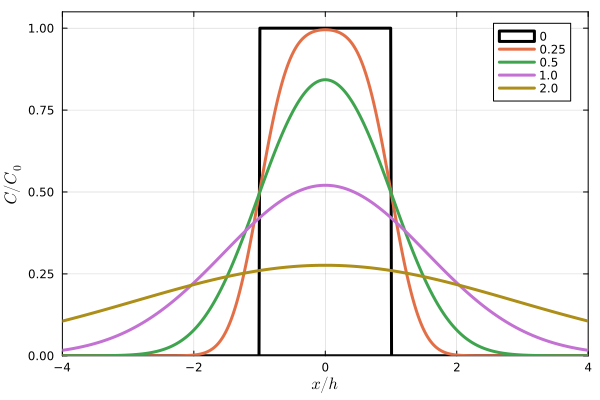

In [8]:
###############################################################################
#  Fig 2.4  –  Extended source of limited extent  (Crank, §2.2.3, eq. 2.15)
###############################################################################
using Plots              # GR backend
using SpecialFunctions   # erf()
using LaTeXStrings       # L"..."

# -------------------- dimensionless grid --------------------------------------
ξ = range(-4.0, 4.0; length = 600)      # −4 ≤ x/h ≤ 4

# -------------------- dimensionless solution ----------------------------------
function C_over_C0(ξ, α)
    if iszero(α)                             # exact rectangle at t = 0
        return Float64.(abs.(ξ) .< 1)        # 1 inside |ξ|<1, else 0
    else
        denom = 2α
        return 0.5 .* (erf.((1 .- ξ) ./ denom) .+
                       erf.((1 .+ ξ) ./ denom))
    end
end

# -------------------- curves to plot ------------------------------------------
α_vals = [0.0, 0.25, 0.5, 1.0, 2.0]          # 0, ¼, ½, 1, 2
curves  = [C_over_C0(ξ, α) for α in α_vals]

# -------------------- build the figure ----------------------------------------
plt = plot(
    xlabel = L"x/h",
    ylabel = L"C/C_0",
    xlim = (-4, 4),
    ylim = (0, 1.05),
    framestyle = :box,
    legend = :topright,
    linewidth = 3,
)

#  t = 0  rectangular profile (α = 0)
plot!(plt, ξ, curves[1];
      seriestype = :shape,
      label = "0",
        linewidth = 3,
      fillalpha = 0,
      linecolor = :black)

#  later times
for (idx, α) in enumerate(α_vals[2:end])
    plot!(plt, ξ, curves[idx + 1];
          label = string(α),
          linewidth = 3)
end

# -------------------- output ---------------------------------------------------
savefig(plt, "Crank_Fig2_15.pdf")   # comment out if not needed
display(plt)